# Analysis for Senior Undergradute Thesis

In [1]:
import sys
sys.path.append("/Users/joshua/Developer/CognitiveSubtypes")

In [2]:
from src.data.build import DataBuilder
from src.data.dataset import Dataset
from src.models.cluster import BestKMeans
from src.models.classify import ClassifierSearch, get_feature_importances
from src.utils import get_array_counts

import src.visualization.figures as figures
import src.visualization.tables as tables

In [3]:
import numpy as np

In [4]:
# set random seed to ensure replicability of analyses
np.random.seed(0)

## 1 - Create Dataset

In [5]:
db = DataBuilder()
db.write_csv()

## 2 - Preprocessing and Preliminary Analysis

### 2.1 - Load Dataset

In [6]:
data = Dataset.load_preprocess()

### 2.2 - Compare Patients and Controls (Table 1)

In [7]:
table1 = tables.KWTestsPvC(data)
table1.get()
table1.save('table1.csv')

## 3 - Clustering

### 3.1 - Fit K-Means Models

In [8]:
clu = BestKMeans()
clu.fit(data.cognitive)

### 3.2 - Plot Metrics (Figure 2)

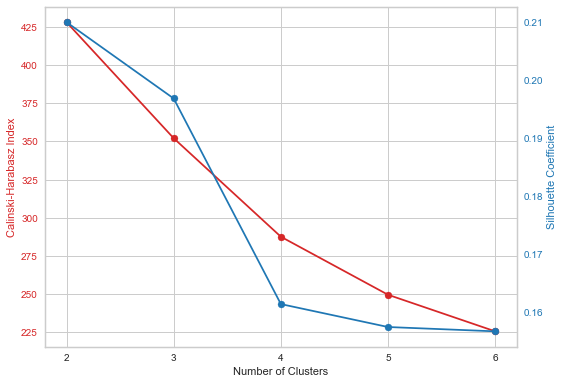

In [9]:
fig2 = figures.KMeansScores(clu)
fig2.plot()
fig2.save("figure2.jpg")

### 3.3 - Assign Target From Selected Model

In [10]:
data.train.target = clu.predict(data.train.cognitive, k=2)
data.test.target = clu.predict(data.test.cognitive, k=2)

In [11]:
get_array_counts(data.target)

,Count,Percent
0,697,51.0
1,663,49.0


### 3.4 - Compare Clusters (Table 2)

In [12]:
table2 = tables.KWTestsClusters(data)
table2.get()
table2.save("table2.csv")

## 4 - Predict Clusters

### 4.1 - Fit Classifiers

In [13]:
cs = ClassifierSearch()
cs.fit(data)

Begin fitting best classifier for model: KNeighborsClassifier
Done!
roc_auc: 0.8813706740933707
Begin fitting best classifier for model: RidgeClassifier
Done!
roc_auc: 0.8224161424855133
Begin fitting best classifier for model: RandomForestClassifier
Done!
roc_auc: 0.9008564619258926


### 4.2 - Plot Classifier Performance (Figure 3)

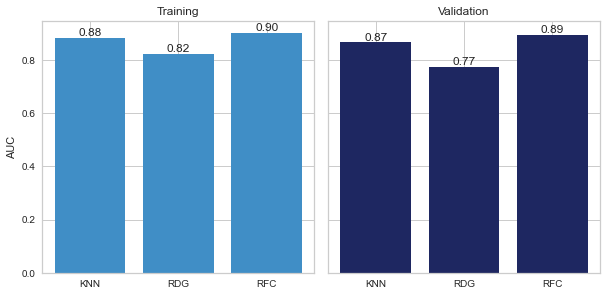

In [14]:
fig3 = figures.AUCScores(cs)
fig3.plot()
fig3.save("figure3.jpg")

### 4.3 - Plot ROC Curve (Figure 4)

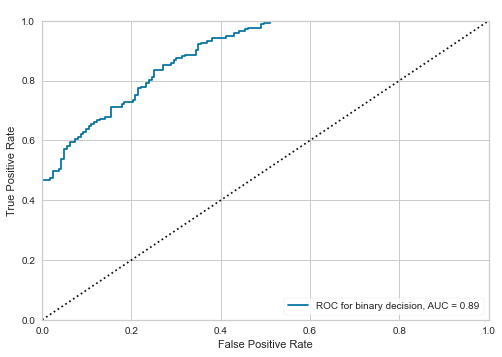

In [15]:
fig4 = figures.ROCCurve(cs, data)
fig4.plot()
fig4.save("figure4.jpg")

### 4.4 - Plot Feature Importances (Figure 5)

In [16]:
feature_importances = get_feature_importances(cs.best_classifier, data.imaging_feature_names)

In [17]:
feature_importances.to_csv("/Users/joshua/Developer/CognitiveSubtypes/data/rois.csv", index=True, index_label='label')

In [18]:
!Rscript /Users/joshua/Developer/CognitiveSubtypes/src/visualization/ggseg.R

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
merging atlas and data by 'label'
Saving 7 x 7 in image
merging atlas and data by 'label'


## 5 - Appendices

### 5.1 - Distributions of Cognitive Variables (Appendix A)

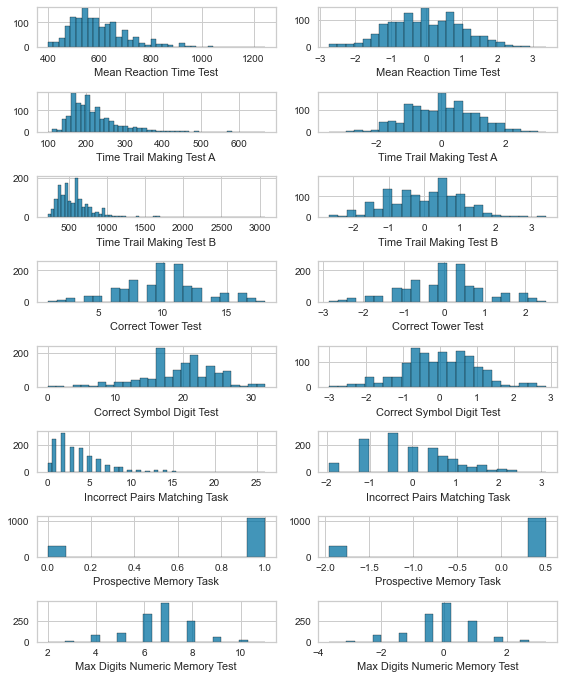

In [19]:
appendix_a = figures.Transforms()
appendix_a.plot()
appendix_a.save("appendix_a.jpg")

### 5.2 - Diagnoses (Appendix B)

In [20]:
appendix_b = tables.Diagnoses()
appendix_b.get()
appendix_b.save("appendix_b.csv")

### 5.3 - Compare SSD and Affective (Appendix C)

In [21]:
appendix_c = tables.KWTestsDX(data)
appendix_c.get()
appendix_c.save("appendix_c.csv")

### 5.4 - Violin Plot (Appendix D)

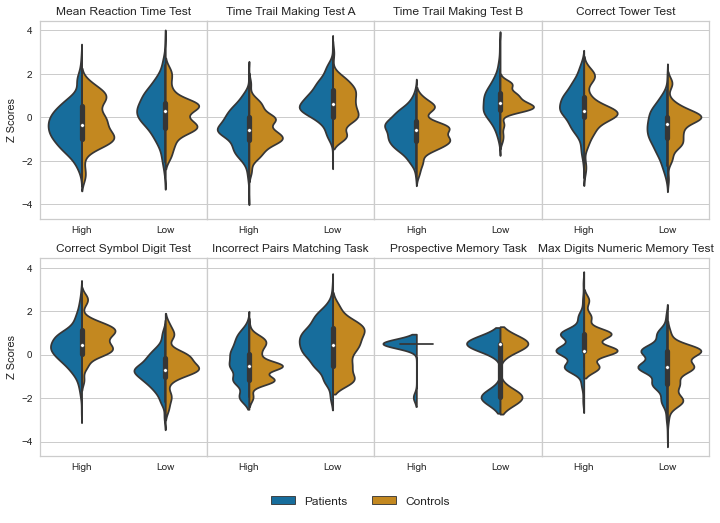

In [22]:
appendix_d = figures.ViolinPlot(data)
appendix_d.plot()
appendix_d.save('appendix_d.jpg')

### 5.3 - Feature Importances (Appendix E)

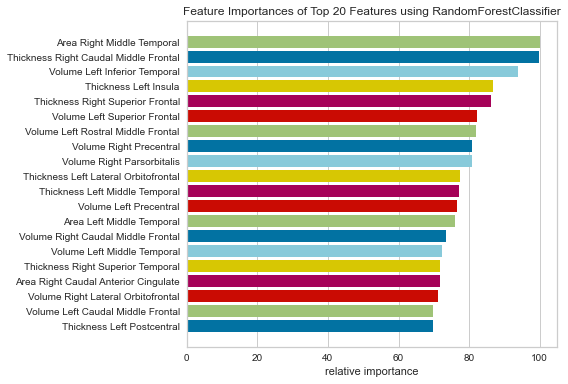

In [23]:
appendix_e = figures.TopFeatures(cs.best_classifier, data)
appendix_e.plot()
appendix_e.save('appendix_e.jpg')